<a href="https://colab.research.google.com/github/iacisme/Colab_Notebooks/blob/main/Classification_Notebook_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A study of `scikit-learn` classification model families on different kinds of patterns

## Purpose

This notebook allows you to study classificaiton algorithms on 3 kinds of data, they are:

1. Linearly Separable Data
2. `Moons` Data
3. `Circular` Data

These datasets are mathematically generated using [`scikit-learn's` data set generating libraries](https://scikit-learn.org/stable/modules/classes.html?highlight=data%20set#module-sklearn.datasets). These datasets are meant to help you study how machine learning models behave, according to the pattern found in the data.

## How to use this notebook

This notebook is meant to be used as a simple study guide. It's to help you understand the different model families through [scikit-learn's](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) machine learning library. The datasets generated in this notebook are simple datasets only, ones with only 2 features (x1, x2). Once you get an intuition of how a model / model family behaves on simple datasets, you can use this knowledge to help you abstract behavoirs on datasets containing more than 2 features.

**It is recommended that you run this notebook one cell at at time.** The code has been commented so that you get to understand what each line is doing. You'll learn faster by understanding what each line of code is doing.

## Python Libraries

Below are the python libraries required to run this notebook. If you're running this notebook in Colab, all these libraries are already installed. If you've downloaded this notebook and want to run it on your own computer, make sure these libraries are installed and up to date:

In [1]:
# Supress warnings
# https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Library to handle arrays and array-like objects
import numpy as np

In [3]:
# Used to create and manipulate tabular data
import pandas as pd

In [4]:
# Plotly figure factory library
# One of the plotly graphing libraries used
import plotly.figure_factory as ff

In [5]:
# Plotly express library
# One of the plotly graphing libraries used
import plotly.express as px

In [6]:
# Plotly graph object library
# One of the plotly graphing libraries used
import plotly.graph_objects as go

In [7]:
# Ipywidgets library
# Used to create interactive tools
import ipywidgets as widgets

In [8]:
# Dispaly widget outputs
from IPython.display import display

### Machine Learning Libraries

Refer to [scikit-learn](https://scikit-learn.org/stable/user_guide.html) documentation for more details about each model listed below. These models are all `classification`.

For reference, here is a table of all ML models that need standard scaling (normalizing, etc):

| Model Family     | Description | Requires Standard Scaling? |
|:-----------------|:------------|:--------------------------:|
| Linear Models    | Linear models like: Logistic Regression, Passive / Aggresive Classifiers / Perceptron / Ridge Classifiers / SGDClassifiers | Yes |
| Linear Discriminate Analysis | Similar to Linear Models | Yes |
| Quadratic Discriminate Analysis | Similar to Linear Models | Yes |
| SVC               | Support Vector Machine - Classifier | Yes |
| KNeighbors        | K-Nearest Neighbors Classifier      | Yes |
| Gaussian Process  | Gaussian Process Classifier         | Yes |
| Gaussian Niave Bayes | Naive Bayes Classifier           | No  |
| Decision Tree | Decision Tree Classifier                | No  |
| Random Forest | Random Forest Classifier                | No  |
| Ada Boost     | Ada Boost Classifier                    | No  |
| HistGradBoosting | HistGradBoosting Classifier          | No  | 
| Dummy Classifier | A simple, rules based classifier     |

This table was inspired by this website: https://www.dataschool.io/comparing-supervised-learning-algorithms/, and this website: https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm/253440#253440?newreg=3de2d6cdc883467e92d876e5e0119cbf

The libraries below all come from the scikit-learn machine learning library:

In [9]:
# Used to split the data between training and testing
from sklearn.model_selection import train_test_split

In [10]:
# Create a pipeline using named steps
from sklearn.pipeline import Pipeline

In [11]:
# Feature preprocessing
# needed for: 
# Linear models (Linear Classifiers)
# Linear Discriminant Analysis
# Quadratic Discriminant Anlysis
# SVC
# KNN
from sklearn.preprocessing import StandardScaler

In [12]:
# Linear classifiers
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier # requires CalibratedClassifierCV
from sklearn.linear_model import Perceptron                  # requires CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifier             # requires CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier               # requires CalibratedClassifierCV

In [13]:
# Linear and Quadratic Discriminant Analysis
# https://scikit-learn.org/stable/modules/lda_qda.html
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
# Support Vector Machine - Classifier
# https://scikit-learn.org/stable/modules/svm.html#classification
from sklearn.svm import SVC                                  # requires CalibratedClassifierCV

In [15]:
# Nearest neighbour - Classifier
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Gaussian Process - Classifier
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process
from sklearn.gaussian_process import GaussianProcessClassifier

In [17]:
# Gaussian Naive Bayes - Classifier
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

In [18]:
# Decision Tree - Classifier
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Ensemble Classifiers
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [20]:
# Dummy Classifier to compare the results of the other classifiers
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.dummy
from sklearn.dummy import DummyClassifier

## Helpers

This section defines all the functions and other helpers that will be used to:

1. Generate the datasets
2. Visualize the data
3. Build, train, test machine learning models

### Functions that generate a dataset

The following functions will be called to generate a dataset, based on the user selection.

#### Linearly Separable Data

In [21]:
# This function will create a linearly separable dataset
def linearly_separable_data():
    # Imports a generator that creates a data set
    # that is linearly seprable
    from sklearn.datasets import make_classification

    # Create a classification data set
    data, target = make_classification(n_samples = 100,
                                       n_features = 2, 
                                       n_redundant = 0, 
                                       n_informative = 2, 
                                       random_state = 1, 
                                       n_clusters_per_class = 1
                                       )
    # Create a random state generator object
    rng = np.random.RandomState(2)

    # Use random state object to create 
    # an X data set
    data += 2 * rng.uniform(size = data.shape)

    # Convert the dataset into a dataframe
    linearly_seperable_df = pd.DataFrame({'feature 1': data[:, 0],
                                          'feature 2': data[:, 1],
                                          'target': target
                                          }
                                         )
    
    return linearly_seperable_df

#### Moons Data

In [22]:
# This function will create a dataset that looks
# like two 1/2 moons
def moons_data():
    # Imports a generator that creates a data set
    # that look like moons
    from sklearn.datasets import make_moons   

    # Create a classification data set
    data, target = make_moons(noise = 0.3, 
                              random_state = 0
                              )
    
    # Convert the dataset into a dataframe
    moons_df = pd.DataFrame({'feature 1': data[:, 0],
                             'feature 2': data[:, 1],
                             'target': target
                             }
                            )  

    return moons_df 

#### Circular Data

In [23]:
# This function will create a dataset that looks
# like circular shapes
def circles_data():
    # Imports a generator that creates a data set
    # that look cicular
    from sklearn.datasets import make_gaussian_quantiles 

    # Create a list of feature names
    feature_names = ["feature 1", "feature 2"]

    # Create an object to store the name of the target
    target_name = "class"

    # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html#sklearn.datasets.make_gaussian_quantiles
    X, y = make_gaussian_quantiles(n_samples = 100, # Total number of samples to generate
                                   n_features = 2,  # The number of features
                                   n_classes = 2,   # How many classes to generate
                                   random_state = 42 # Random seed generator
                                   )
    
    # We store both the data and target in a dataframe to ease plotting
    # This code will concatenate both the X and y columns, and use the 
    # feature_names and target_name to name the columns
    circles_df = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis = 1),
                              columns = feature_names + [target_name]
                              )
    return circles_df

### Function to generate a scatterplot

In [24]:
# Function used to generate a scatterplot
# of column 1 (x) and column 2 (y)
def generate_plotly_scatterplot(df, default_colors = ['red', 'blue']):
    #Generate the scatterplot
    scatter_plot = px.scatter(df,
                              x = df.iloc[:, 0],
                              y = df.iloc[:, 1],
                              color = df.iloc[:, 2].astype('str'),
                              color_discrete_sequence = default_colors,
                             )
    
    # return the scatterplot object back to the main program for plotting
    return scatter_plot

## Functions to generate plots

The following functions are used to generate the `contour maps` and `decision boundaries`.

### `set_up_grid_space`

The purpose of this function is to:

1. Generate a set of x / y coordinates to set up a gridspace
2. Generate a set of point that will be used to create contour maps / decision boundaries
3. Generate the numbers in a specified series of incremental steps

In [25]:
# The purpose of this function is to transform the min / max
# values of the features into a set of coordinates that can 
# be passed into the ML model to make prediction probabilities
# that can be visualized on a 2D gride.
# The inputs are:
# 1. The dataframe
# 2. The border size
# 3. The incremental steps in between each stored value
# The output is a set of objects that can be used as inputs to an ML model
# as well as set up a plot grid.
def set_up_grid_space(df, border, plot_step):
    
    # Prepare inputs to create a mesh gride
    # These are the 'X' inputs
    x_min, x_max = df.iloc[:, 0].min() - border, df.iloc[:, 0].max() + border
    
    # Prepare inputs to create a mesh gride
    # These are the 'Y' inputs
    y_min, y_max = df.iloc[:, 1].min() - border, df.iloc[:, 1].max() + border
    
    # Set up an xrange
    xrange = np.arange(x_min, x_max, plot_step)
    
    # Set up an yrange
    yrange = np.arange(y_min, y_max, plot_step)
    
    # Create a mesh grid on which we will run our model
    xx, yy = np.meshgrid(xrange, yrange)
    
    return xx, yy, xrange, yrange

### `model_outputs_to_plot`

This function is used to help generate the contour map

In [26]:
def model_outputs_to_plot(fitted_classifier, xx, yy):
    # A label encoder is used to transform the input 
    # into an object that can be used in graphing
    from sklearn.preprocessing import LabelEncoder
    
    # Some models have decision boundaries, some can predict probabilities
    # This will create an output depending on the available model class
    if hasattr(fitted_classifier, 'decision_function'):
        Z = fitted_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = fitted_classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # Transform Z so that it can be plotted
    Z = LabelEncoder().fit_transform(Z)
    
    # Reshape Z to the shape of xx
    # so that it can be used in plotting
    Z = Z.reshape(xx.shape)
    
    return Z

### `generate_contour_map`

This function generates the countour map

In [27]:
def generate_countor_map(df, fitted_classifier):
    
    # Min / max added to the scale, for plotting purposes
    border = 1
    
    # The incremental steps between one point and the next
    # when setting up the scale value grid
    plot_step = 0.02
    
    # Generate a set of x / y coordinates that will be used 
    # in creating the contour map
    xx, yy, xrange, yrange = set_up_grid_space(df,
                                               border, # border
                                               plot_step, # plot_step
                                               )  
    
    # Generate the Z parameter, needed for plotting the countour map
    Z = model_outputs_to_plot(fitted_classifier, xx, yy)
    
    
    # Generate the countour
    fig = go.Figure(data = [go.Contour(x = xrange,
                                       y = yrange,
                                       z = Z,
                                       showscale = False,
                                       colorscale = 'balance',
                                       opacity = 0.4,
                                       name = 'Score',
                                       hoverinfo = 'skip'
                                      )
                           ]
                 )
    
    return fig 

### `create_a_decision_boundary`

This function is used in helping create a decision boundary.

In [28]:
def create_a_decision_boundary(fitted_classifier, df, xx, yy):
    
    # Some models have decision boundaries, some can predict probabilities
    # This will create an output depending on the model
    if hasattr(model, 'predict_proba'):
        # compute the associated prediction
        # Predict the probablity of this model
        proba = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    else:
        # Calibrators and Crossvalidators
        # Calibrators
        # Calibrators are used on any model that doesn't have a 'predict_proba' class method.
        # you'll get en error in the cell trying to call this method.
        # the workaround is to use a `CalibratedClassifierCV'
        #https://scikit-learn.org/stable/modules/classes.html#module-sklearn.calibration
        from sklearn.calibration import CalibratedClassifierCV

        # Create a calibrator object
        # it needs to be passed a model when created
        model_calibrator = CalibratedClassifierCV(model)

        # Create a calibrated model with predict_proba method available
        calibrated_model = model_calibrator.fit(data_set.iloc[:, 0:2], data_set.iloc[0:, 2])

        # Generate probabilities based on the xx, yy values
        proba = calibrated_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Reshapes the data to the number of features
    # you intend to make predictions
    proba = proba.reshape(xx.shape + (2,))

    # Compute the confidence, which is the difference
    diff = proba.max(axis = -1) - (proba.sum(axis = -1) - proba.max(axis = -1))
    
    return diff, proba

### `generate_decision_boundary_map`

This function is used to generate the decision boundary

In [29]:
def generate_decision_boundary_map(df, fitted_classifier):
    
    # Min / max added to the scale, for plotting purposes
    border = 1
    
    # The incremental steps between one point and the next
    # when setting up the scale value grid
    plot_step = 0.02
    
    # Generate a set of x / y coordinates that will be used 
    # in creating the contour map
    xx, yy, xrange, yrange = set_up_grid_space(df,
                                               border, # border
                                               plot_step, # plot_step
                                               )  
    
    # Function used to create the decision bounday inputs needed to generate a 
    # plot
    diff, proba = create_a_decision_boundary(fitted_classifier, df, xx, yy)
    
    
    # Generate the heat map showing the confidence levels
    fig = go.Figure(data = [go.Heatmap(x = xrange,
                                       y = yrange,
                                       z = diff,
                                       opacity = 0.25,
                                       customdata = proba,
                                       colorscale = 'RdBu',
                                       hovertemplate = ('feature 1: %{x} <br>'
                                                        'feature 2: %{y} <br>'
                                                        'p(0): %{customdata[0]:.3f}<br>'
                                                        'p(1): %{customdata[1]:.3f}<extra></extra>'
                                                       )
                                      )
                           ]
                  )

    return fig

## Function to build a model

This function will build a model, based on user selection

In [30]:
def build_a_model(name):
    # If the user choses a Logist Regression Model
    if name == 'Logistic Regression':
        print(f'Building a {name} Model')
        # Create a Logistic regression model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('Logistic Regression', LogisticRegression())
                                ] 
                        )

    # If the user choses a Passive Agressive Model
    elif name == 'Passive Agressive Classifier':
        print(f'Building a {name} Model')
        # Create a Passive / agrresive model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('PAC', PassiveAggressiveClassifier())
                                ] 
                        )

    # If the user choses a Passive Agressive Model
    elif name == 'Perceptron':
        print(f'Building a {name} Model')
        # Build a Perceptron Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('Perceptron', Perceptron())
                                ] 
                        )
        
    # If the user choses a Ridge Model
    elif name == 'Ridge':
        print(f'Building a {name} Model')
        # Build a Ridge Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('Ridge', RidgeClassifier())
                                ] 
                        )

    # If the user choses a SGD Model
    elif name == 'Stochastic Gradient Descent (SGD)':
        print(f'Building a {name} Model')
        # Build a SGD Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('SGD', SGDClassifier())
                                ] 
                        )

    # If the user choses a QDA Model
    elif name == 'Linear Discriminant Analysis (LDA)':
        print(f'Building a {name} Model')
        # Build a LDA Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('LDA', LinearDiscriminantAnalysis())
                                ] 
                        )

    # If the user choses a QDA Model
    elif name == 'Quadratic Discriminant Analysis (QDA)':
        print(f'Building a {name} Model')
        # Build a QDA Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('QDA', QuadraticDiscriminantAnalysis())
                                ] 
                        )   

    # If the user choses a SVM Model
    elif name == 'Support Vector Machine':
        print(f'Building a {name} Model')
        # Build a SVM Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('SVM', SVC(kernel = svc_kernel, 
                                            gamma = svc_gamma
                                            )
                                    )
                                ] 
                            )

    # If the user choses a KNN Model
    elif name == 'Nearest Neighbor (KNN)':
        print(f'Building a {name} Model')
        # Build a KNN Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('KNN', KNeighborsClassifier())
                                ] 
                        )

    # If the user choses a Gaussian Process
    elif name == 'Gaussian Process':
        print(f'Building a {name} Model')
        # Build a Gaussian Process Model
        model = Pipeline(steps = [("Standard Scaler", StandardScaler()),
                                ('Gaussian Process', GaussianProcessClassifier())
                                ] 
                        )

    # If the user choses a Niave Bayes
    elif name == 'Niave Bayes':
        print(f'Building a {name} Model')
        # Build a Naive Bayes Model
        model = Pipeline(steps = [('Naive Bayes', GaussianNB())
                                ] 
                        )

    # If the user choses a Decision Tree
    elif name == 'Decision Tree':
        print(f'Building a {name} Model')
        # Build a Decision Tree Model
        model = Pipeline(steps = [("Decision Tree", DecisionTreeClassifier()),
                                ] 
                        )

    # If the user choses a Random Forest
    elif name == 'Random Forest':
        print(f'Building a {name} Model')
        # Build a Random Forest Model
        model = Pipeline(steps = [("Random Forest", RandomForestClassifier()),
                                ] 
                        )

    # If the user choses a ADA Boost Model
    elif name == 'Ada Boost':
        print(f'Building a {name} Model')
        # Build a ADA Boost Model
        model = Pipeline(steps = [("Ada Boost", AdaBoostClassifier()),
                                ] 
                        )

    # If the user choses a Hist Grade Boost Model
    elif name == 'Hist Grade Boosting':
        print(f'Building a {name} Model')
        # Build a Hist Grade Boosting Model
        model = Pipeline(steps = [("Hist Grade Boost", HistGradientBoostingClassifier()),
                                            ] 
                                    )

    # If the user choses a Dummy Classifier Model
    elif name == 'Dummy Classifier':
        print(f'Building a {name} Model')
        # Build a Dummy Classifier
        model = Pipeline(steps = [("Dummy", DummyClassifier()),
                                ] 
                        ) 
    return model

## Selecting a dataset

The code below will help you create a dataset to model. The following images are examples of each kind of dataset:

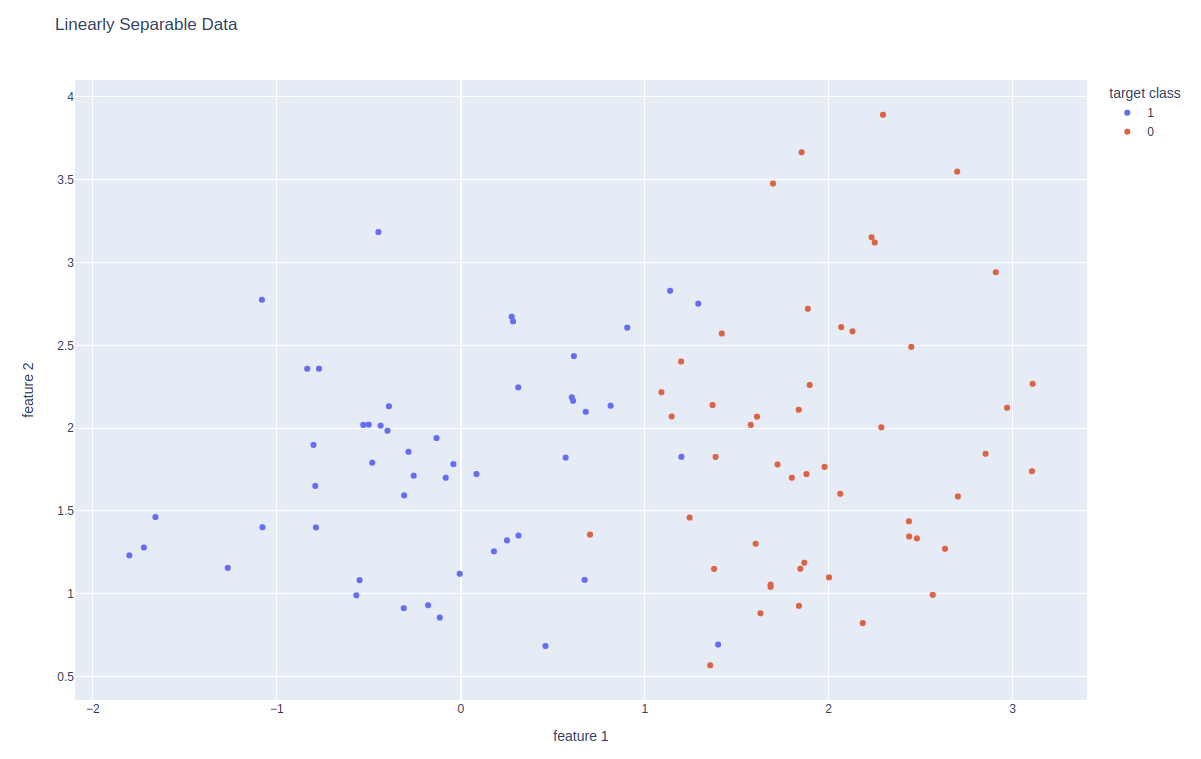

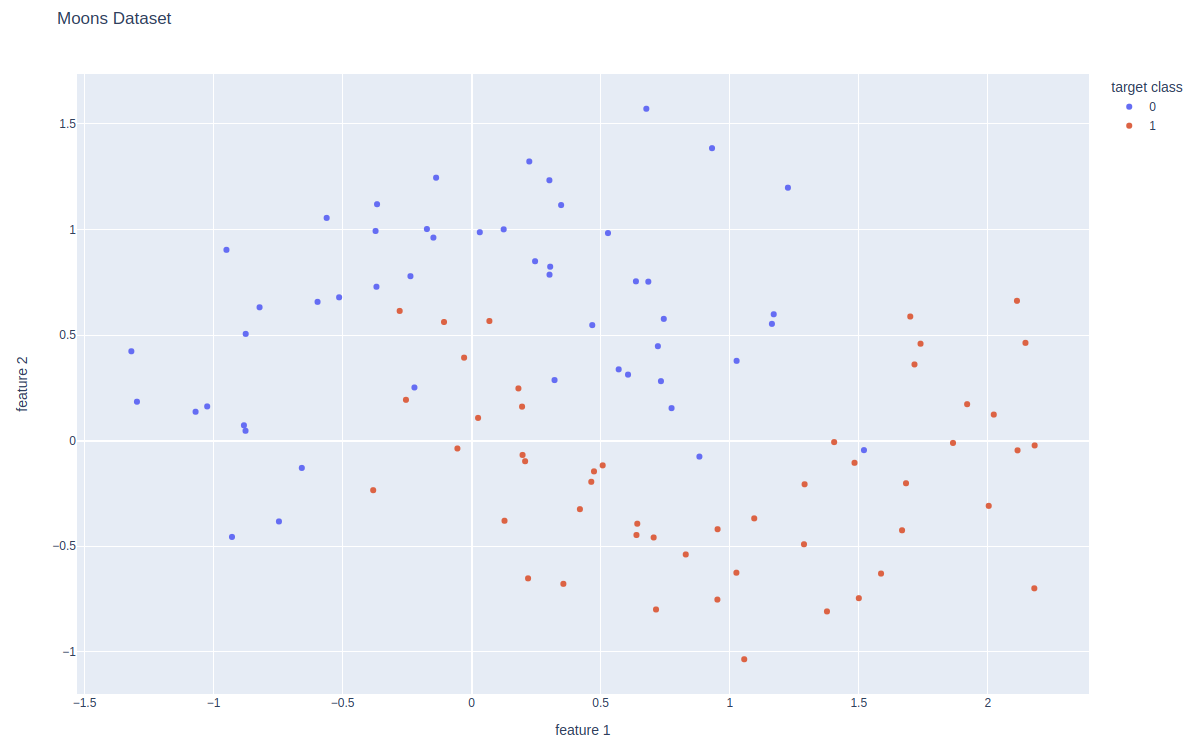

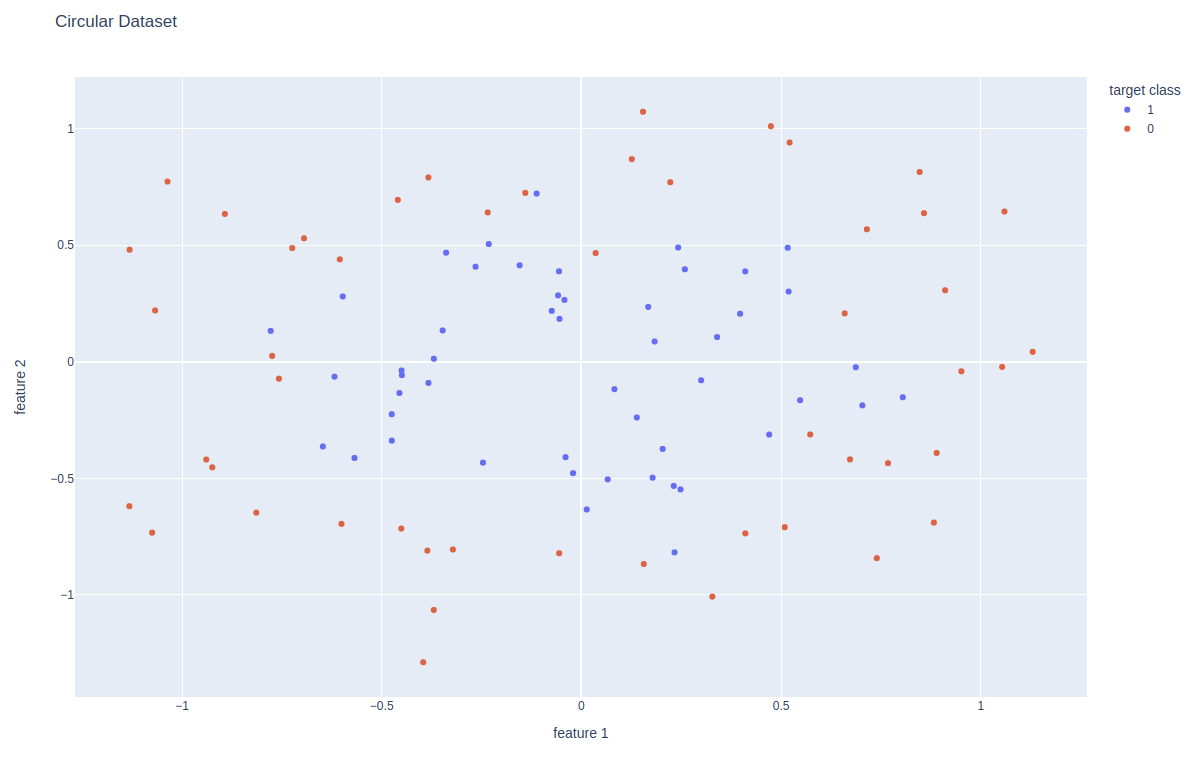

## Selecting a dataset

The code below is used to create buttons. These buttons allow a user to select a dataset that will be used to train, test, and visualize a machine learning model output.

### Creating the button

The code below creates a `button` object. The object will be displayed in another code cell.

In [31]:
# Create buttons so a user can select a dataset to model
data_set_kind = widgets.ToggleButtons(options = ['Linearly Separable', 'Moons', 'Circular Shapes'],
                                      description = 'Dataset type: ',
                                      disabled = False,
                                      button_style = '', # 'success', 'info', 'warning', 'danger' or ''
                                      tooltips = ['Data that can be separated using a line', 'A dataset that looks like 2 half-moon', 'A Circular kind of dataset'],
                                      # icons=['check'] * 3
                                     )

### Button linking

This code below links the buttons to an output so the user can get confirmation of their choice:

In [32]:
# Create an output object
# used to display user changes to the dataset
output = widgets.Output()

In [33]:
# Function to observe 
# user input changes
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("You have selected: %s" % change['new'])

In [34]:
# Observe changes to user selection
data_set_kind.observe(on_change)

### Displaying the button

This code will display the button, and capture the change a user makes.

In [35]:
# Display a selection of buttons so the user
# can choose a dataset
display(data_set_kind, output)
print(f"Default selection is '{data_set_kind.value}' dataset")

ToggleButtons(description='Dataset type: ', options=('Linearly Separable', 'Moons', 'Circular Shapes'), toolti…

Output()

Default selection is 'Linearly Separable' dataset
You have selected: Moons
You have selected: Linearly Separable
You have selected: Circular Shapes
You have selected: Moons
You have selected: Linearly Separable
You have selected: Moons
You have selected: Circular Shapes
You have selected: Moons


## Visualizing Selected Dataset

The code below will take the user input, and fetch the selected dataset, and provide certain configuration parameters that will be used in building machine learning models.

Re-run `all` the code below, every time a new dataset is selected, to see the results of that data set. 

In [131]:
# Create the dataset based on user selection
if data_set_kind.value == 'Linearly Separable':
    data_set = linearly_separable_data()
    data_set_type = "Linearly Separable Dataset"
    svc_kernel = 'linear'
    svc_gamma = 'scale'
elif data_set_kind.value == 'Moons':
    data_set = moons_data()
    data_set_type = "Moons Dataset"
    svc_kernel = 'rbf'
    svc_gamma = 5
elif data_set_kind.value == 'Circular Shapes':
    data_set = circles_data()
    data_set_type = "Circular-Shape Dataset"
    svc_kernel = 'rbf'
    svc_gamma = 5

In [132]:
# Generate a scatterplot of the two features found in this dataset
plotly_scatter_plot = generate_plotly_scatterplot(data_set)

# Update general plot layout
plotly_scatter_plot.update_layout(title = data_set_type,
                                  title_font_size= 30,
                                  height = 600,
                                  width = 800,
                                  legend_orientation = 'v',
                                  #paper_bgcolor = 'rgba(0,0,0,0)',
                                  #plot_bgcolor = 'rgba(0,0,0,0)',
                                   xaxis_title = "Feature 1",
                                   yaxis_title = "Feature 2",
                                  dragmode = 'drawopenpath'
                                 )

# Allows the user to annotate the plot
plotly_scatter_plot.show(config = {'modeBarButtonsToAdd':['drawline',
                                                          'drawopenpath',
                                                          'drawclosedpath',
                                                          'drawcircle',
                                                          'drawrect',
                                                          'eraseshape'
                                                           ]
                                  }
                        )

What patterns can you identify in the data?

## Create a data and target set

### Split dataset 

The two cells below split the dataset into a data, and target set.

In [133]:
# Generate data for machine learning
data = data_set.iloc[:, 0:2]

data

feature 1  feature 2
0    0.031595   0.986988
1    2.115098  -0.046244
2    0.882490  -0.075756
3   -0.055144  -0.037332
4    0.829545  -0.539321
..        ...        ...
95   1.699453   0.587720
96   0.218623  -0.652521
97   0.952914  -0.419766
98  -1.318500   0.423112
99  -1.296818   0.184147

[100 rows x 2 columns]

In [134]:
# Generate a target for machine learning
target = data_set.iloc[:, 2]

target

0     0
1     1
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    0
99    0
Name: target, Length: 100, dtype: int64

## Training / Testing split

It's always best practice to test your model on unseen data. Therefore we will split our data into a training / testing split.

In [135]:
# Split the data between training and testing.
data_train, data_test, target_train, target_test = train_test_split(data, 
                                                                    target, 
                                                                    test_size = 0.20, # Change to 0.25
                                                                    random_state = 0,
                                                                    shuffle = True,   # Run with this line commented out
                                                                    stratify = target # Run with this line commented out
                                                                    )

# Model Inspection

Use the radio-buttons to select a model to build: 

In [136]:
# This code will create a radio button that allows the user to select a machine learning
# model to inspect
model_selector = widgets.RadioButtons(options = ['Logistic Regression',
                                                 'Passive Agressive Classifier',
                                                 'Preceptron',
                                                 'Ridge',
                                                 'Stochastic Gradient Descent (SGD)',
                                                 'Linear Discriminant Analysis (LDA)',
                                                 'Quadratic Discriminant Analysis (QDA)',
                                                 'Support Vector Machine',
                                                 'Nearest Neighbor (KNN)',
                                                 'Gaussian Process',
                                                 'Niave Bayes',
                                                 'Decision Tree',
                                                 'Random Forest',
                                                 'Ada Boost',
                                                 'Hist Grade Boosting',
                                                 'Dummy Classifier',
                                                 ],
                                            value = 'Logistic Regression',
                                            layout = {'width': 'max-content'}, # If the items' names are long
                                            )

# Print a message to the user:
print("Please select a machine learning model to inspect:")
# Display the radio button
model_selector

Please select a machine learning model to inspect:


RadioButtons(layout=Layout(width='max-content'), options=('Logistic Regression', 'Passive Agressive Classifier…

Re-run the cells below to inspect the output of the model selected above.

In [137]:
# Inspect the object value
model_selector.value

'Support Vector Machine'

In [138]:
model = build_a_model(model_selector.value)

Building a Support Vector Machine Model


In [139]:
# fit the model with training data                 
model.fit(data_train, target_train)

Pipeline(steps=[('Standard Scaler', StandardScaler()), ('SVM', SVC(gamma=5))])

In [140]:
# Score (test) the model performance using unseen data
score = model.score(data_test, target_test)

score

0.95

# Visualize the model

Use the code below to visualize the output of your model.

In [141]:
# Confirm the model selection for visualizing
if len(model.steps) == 1:
    model_name = model.steps[0]
elif len(model.steps) == 2:
    model_name = model.steps[1]

model_name[0]

'SVM'

## Contour map

Run this code to visualize a countour map:

In [144]:
# Set the default colors
default_colors = ['blue' , 'red']

In [145]:
# Generate a scatterplot object
fig1 = generate_plotly_scatterplot(data_set, 
                                   default_colors
                                   )

# Generate a countour map
fig2 = generate_countor_map(data_set, model)

# Combing the two data sets into one graph
fig3 = go.Figure(data = fig1.data + fig2.data)

# Update general plot layout
fig3.update_layout(title = f"{model_name[0]} Countour Map. Accuracy score = {score}",
                   title_font_size= 20,
                   height = 600,
                   width = 800,
                   legend_orientation = 'v',
                   paper_bgcolor = 'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   dragmode = 'drawopenpath'
                  )

fig3.show(config = {'modeBarButtonsToAdd':['drawline',
                                           'drawopenpath',
                                           'drawclosedpath',
                                           'drawcircle',
                                           'drawrect',
                                           'eraseshape'
                                          ]
                    }
          )

## Decision Boundary

Run this code to visualize a decision boundary:

In [146]:
# Generate a scatterplot object
fig1 = generate_plotly_scatterplot(data_set,
                                   default_colors
                                   )

# Generate a decisoin boundary
fig2 = generate_decision_boundary_map(data_set, model)

# Combing the two data sets into one graph
fig3 = go.Figure(data = fig1.data + fig2.data)

# Update general plot layout
fig3.update_layout(title = f"{model_name[0]} Decision Boundary. Accuracy score = {score}",
                   title_font_size= 20,
                   height = 600,
                   width = 800,
                   legend_orientation = 'h',
                   paper_bgcolor = 'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   dragmode = 'drawopenpath'
                   )

fig3.show(config = {'modeBarButtonsToAdd':['drawline',
                                           'drawopenpath',
                                           'drawclosedpath',
                                           'drawcircle',
                                           'drawrect',
                                           'eraseshape'
                                          ]
                  }
        )